# **Importing of module**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
db = pd.read_csv(r'/content/drive/MyDrive/train.csv')

In [3]:
db.head(5)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


**Overview of the data**

In [4]:
db.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [5]:
db.shape

(45211, 11)

In [6]:
db.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [7]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [8]:
db.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [9]:
db.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [10]:
db['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [11]:
db['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [12]:
db['education_qual'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [13]:
db['call_type'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [14]:
db['mon'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [15]:
db['prev_outcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [16]:
db['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

**Overview of data using plot**

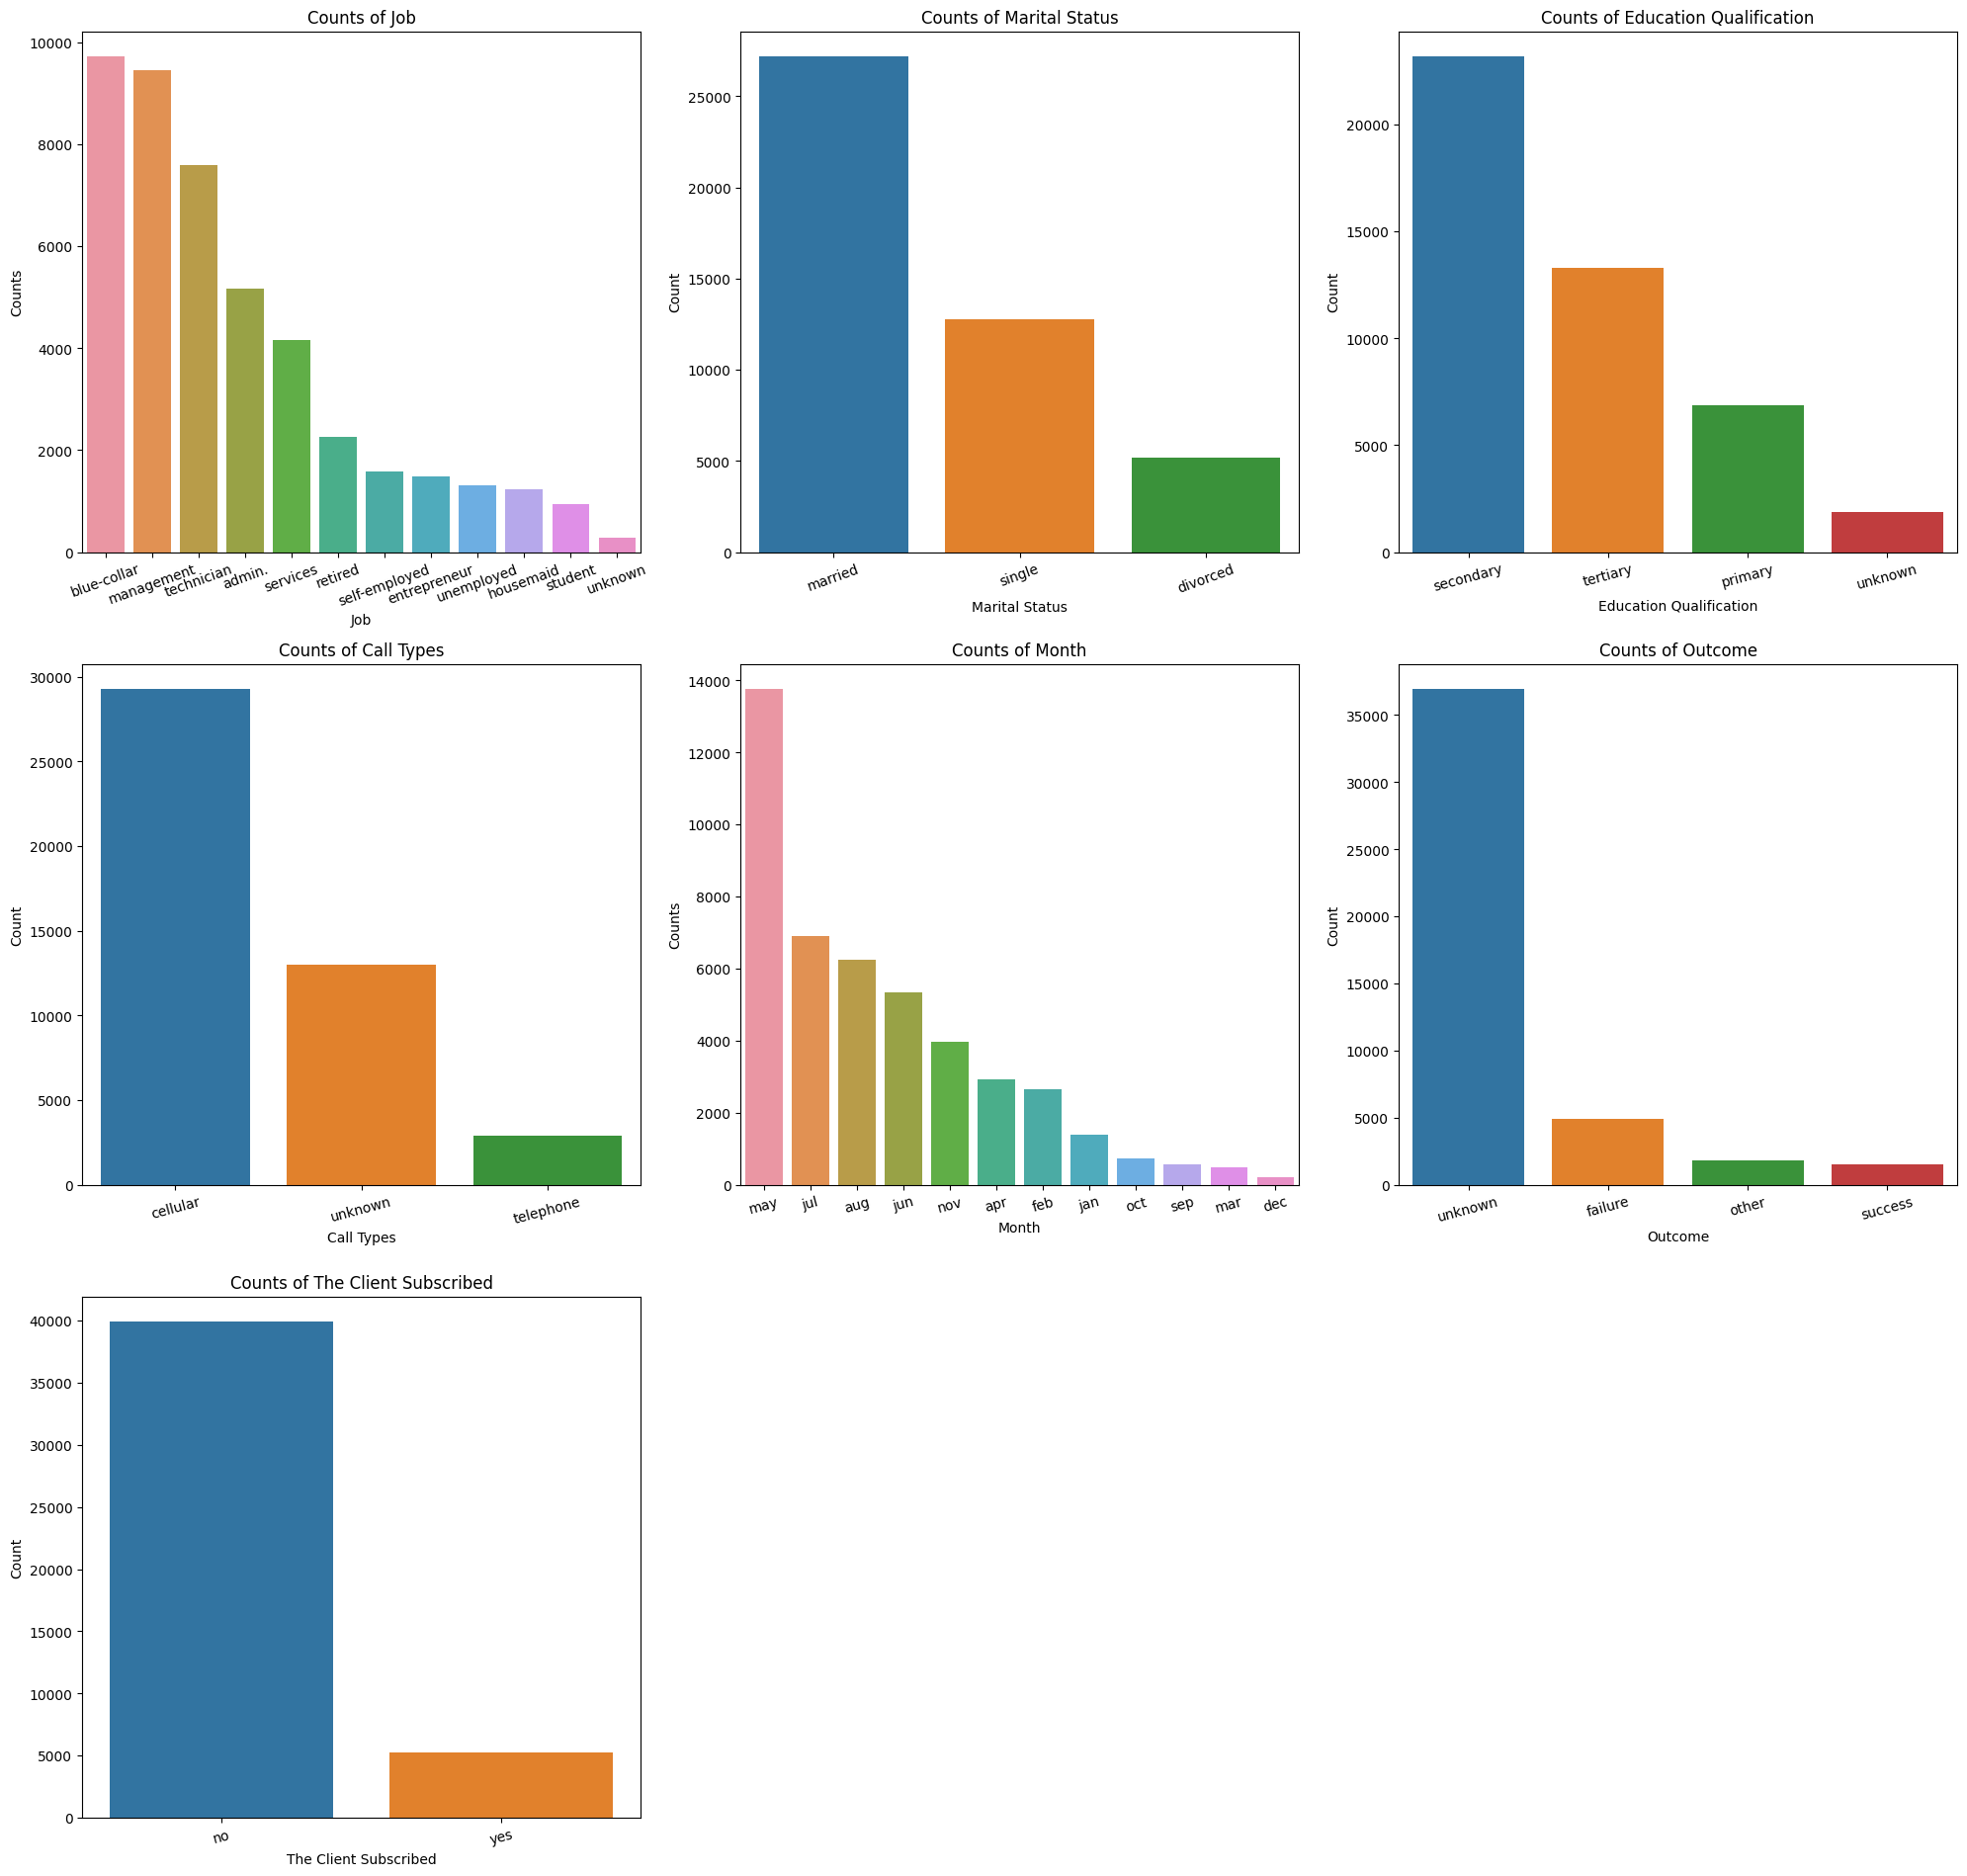

In [17]:

# Create a figure with subplots
plt.figure(figsize=(20, 25))

# Subplot 1
plt.subplot(4, 3, 1)
sns.countplot(data=db, x='job', order=db['job'].value_counts().index)
plt.xticks(rotation=20)
plt.xlabel('Job')
plt.ylabel('Counts')
plt.title('Counts of Job')

# Subplot 2
plt.subplot(4, 3, 2)
sns.countplot(data=db, x='marital', order=db['marital'].value_counts().index)
plt.xticks(rotation=20)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Counts of Marital Status')

# Subplot 3
plt.subplot(4, 3, 3)
sns.countplot(data=db, x='education_qual', order=db['education_qual'].value_counts().index)
plt.xticks(rotation=15)
plt.xlabel('Education Qualification')
plt.ylabel('Count')
plt.title('Counts of Education Qualification')

# Subplot 4
plt.subplot(4, 3, 4)
sns.countplot(data=db, x='call_type', order=db['call_type'].value_counts().index)
plt.xticks(rotation=15)
plt.xlabel('Call Types')
plt.ylabel('Count')
plt.title('Counts of Call Types')

# Subplot 5
plt.subplot(4, 3, 5)
sns.countplot(data=db, x='mon', order=db['mon'].value_counts().index)
plt.xticks(rotation=15)
plt.xlabel('Month')
plt.ylabel('Counts')
plt.title('Counts of Month')

# Subplot 6
plt.subplot(4, 3, 6)
sns.countplot(data=db, x='prev_outcome', order=db['prev_outcome'].value_counts().index)
plt.xticks(rotation=15)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Counts of Outcome')

# Subplot 7
plt.subplot(4, 3, 7)
sns.countplot(data=db, x='y', order=db['y'].value_counts().index)
plt.xticks(rotation=15)
plt.xlabel('The Client Subscribed')
plt.ylabel('Count')
plt.title('Counts of The Client Subscribed')

# Adjust subplot layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


**From this above plot I found the overview of the tabel or column**

> **Job** : From this job column **Blue-collar** and **Management** are high

> **Marital** : From this column **Married** is high

> **Education qualification** : In this column of education qualification **Secondary** is high

> **Call Type** : In the column of call type **Cellular** is high

> **Month** : From the column of month in the data **May** is high

> **Outcome** : In the column of outcome **Unknown** is high

> **Subscribed count** : In the subscribed count column **No** is high












# **Ploting the data with the target value**

**Ploting of data using Categorical data Vs Target value**

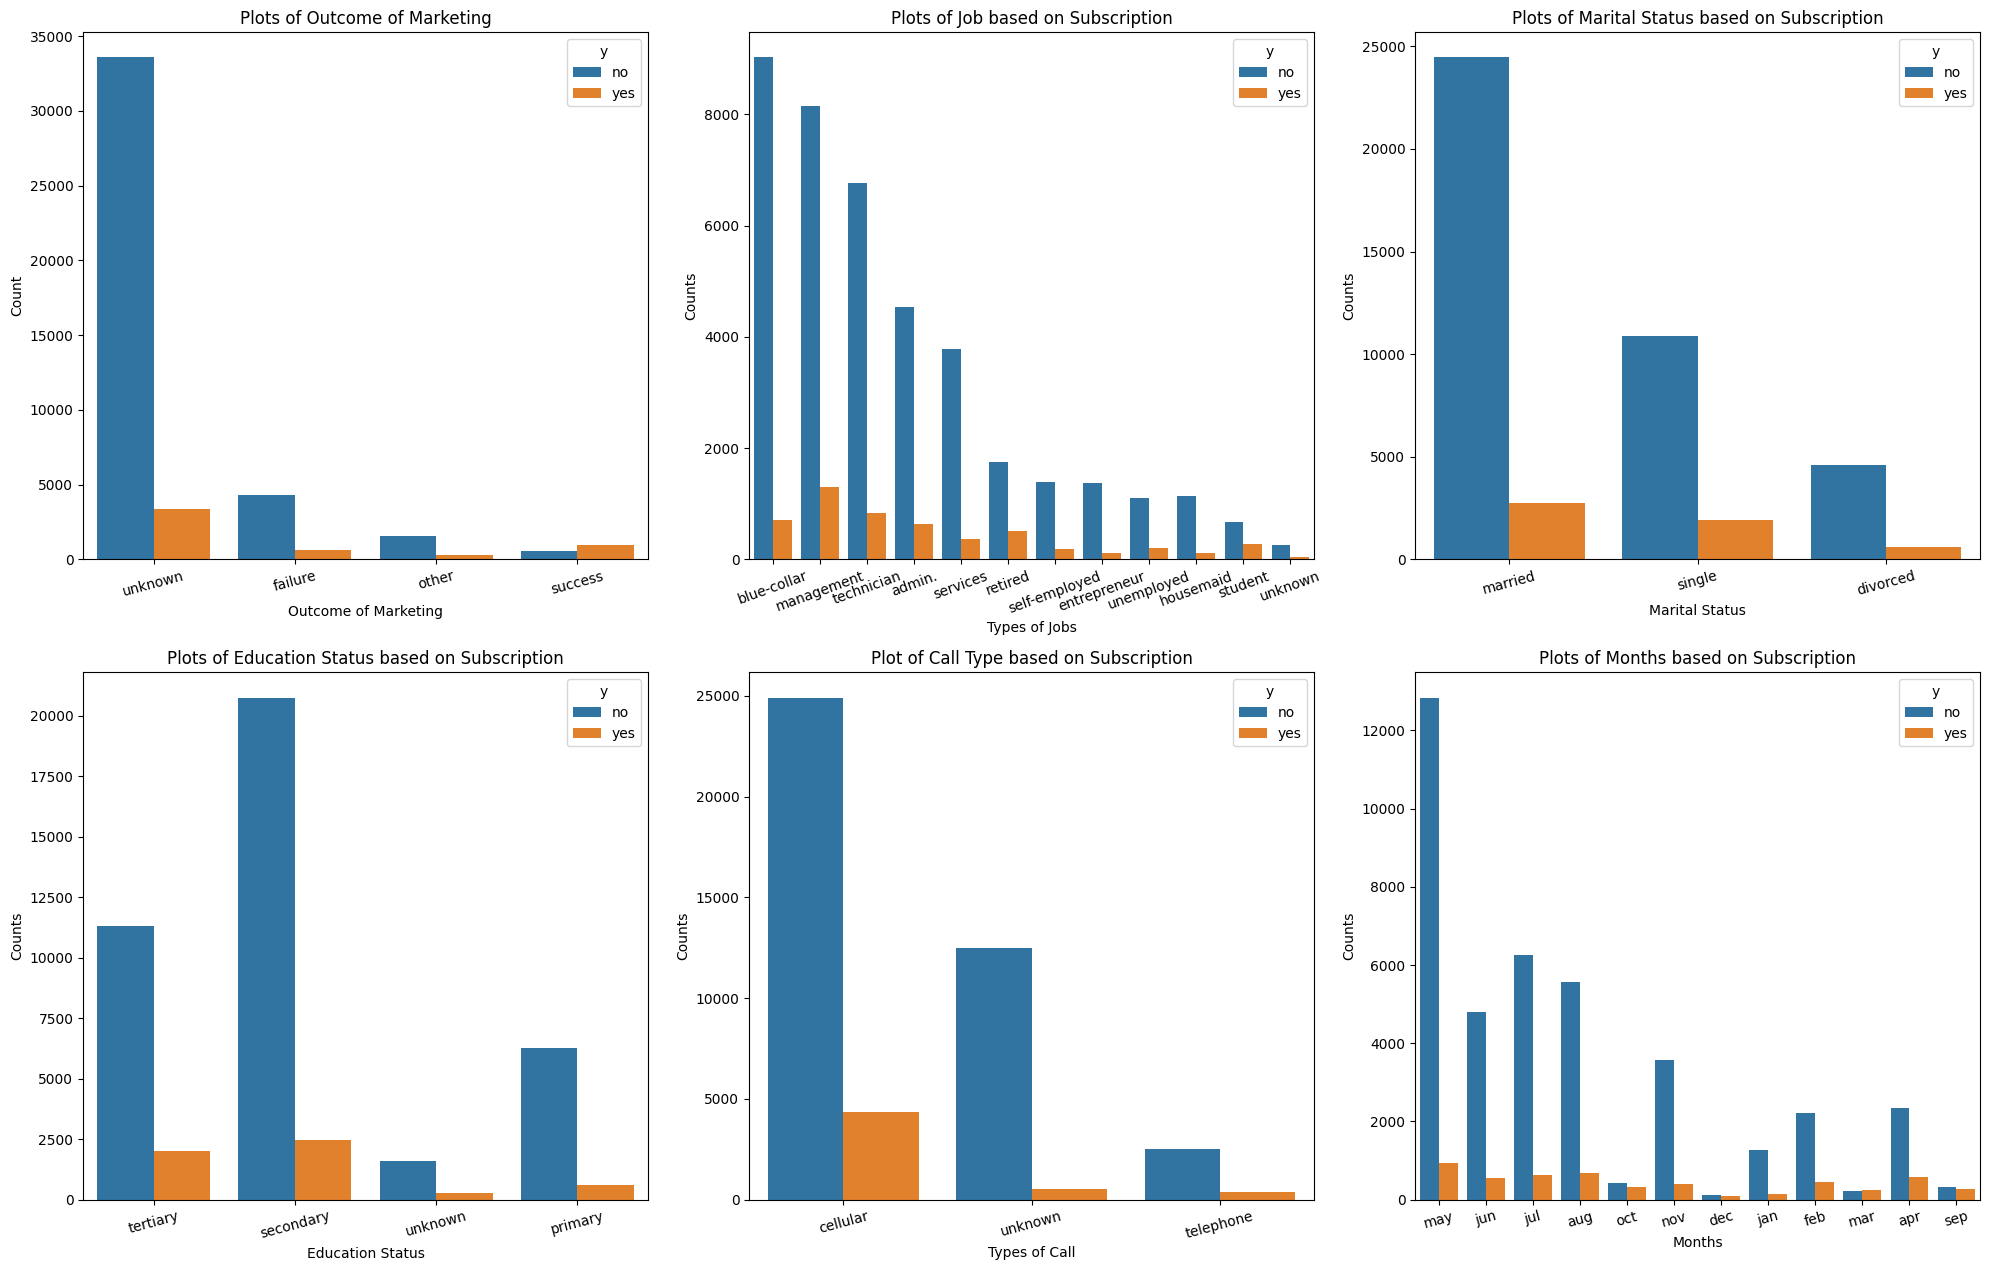

In [19]:
# Create a figure with subplots
plt.figure(figsize=(20, 25))
# Subplot 1
plt.subplot(4, 3, 1)
sns.countplot(data=db, x='prev_outcome', hue='y')
plt.xticks(rotation=15)
plt.xlabel('Outcome of Marketing')
plt.ylabel('Count')
plt.title('Plots of Outcome of Marketing')

# Subplot 2
plt.subplot(4, 3, 2)
sns.countplot(data=db, x='job', hue='y', order=db['job'].value_counts().index)
plt.xticks(rotation=20)
plt.xlabel('Types of Jobs')
plt.ylabel('Counts')
plt.title('Plots of Job based on Subscription')

# Subplot 3
plt.subplot(4, 3, 3)
sns.countplot(data=db, x='marital', hue='y')
plt.xlabel('Marital Status')
plt.ylabel('Counts')
plt.xticks(rotation=15)
plt.title('Plots of Marital Status based on Subscription')

# Subplot 4
plt.subplot(4, 3, 4)
sns.countplot(data=db, x='education_qual', hue='y')
plt.xticks(rotation=15)
plt.xlabel('Education Status')
plt.ylabel('Counts')
plt.title('Plots of Education Status based on Subscription')

# Subplot 5
plt.subplot(4, 3, 5)
sns.countplot(data=db, x='call_type', hue='y', order=db['call_type'].value_counts().index)
plt.xticks(rotation=15)
plt.xlabel('Types of Call')
plt.ylabel('Counts')
plt.title('Plot of Call Type based on Subscription')

# Subplot 6
plt.subplot(4, 3, 6)
sns.countplot(data=db, x='mon', hue='y')
plt.xticks(rotation=15)
plt.xlabel('Months')
plt.ylabel('Counts')
plt.title('Plots of Months based on Subscription')

# Adjust subplot layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


**Ploting of data using of continuous data Vs Traget value**

Text(0, 0.5, 'y')

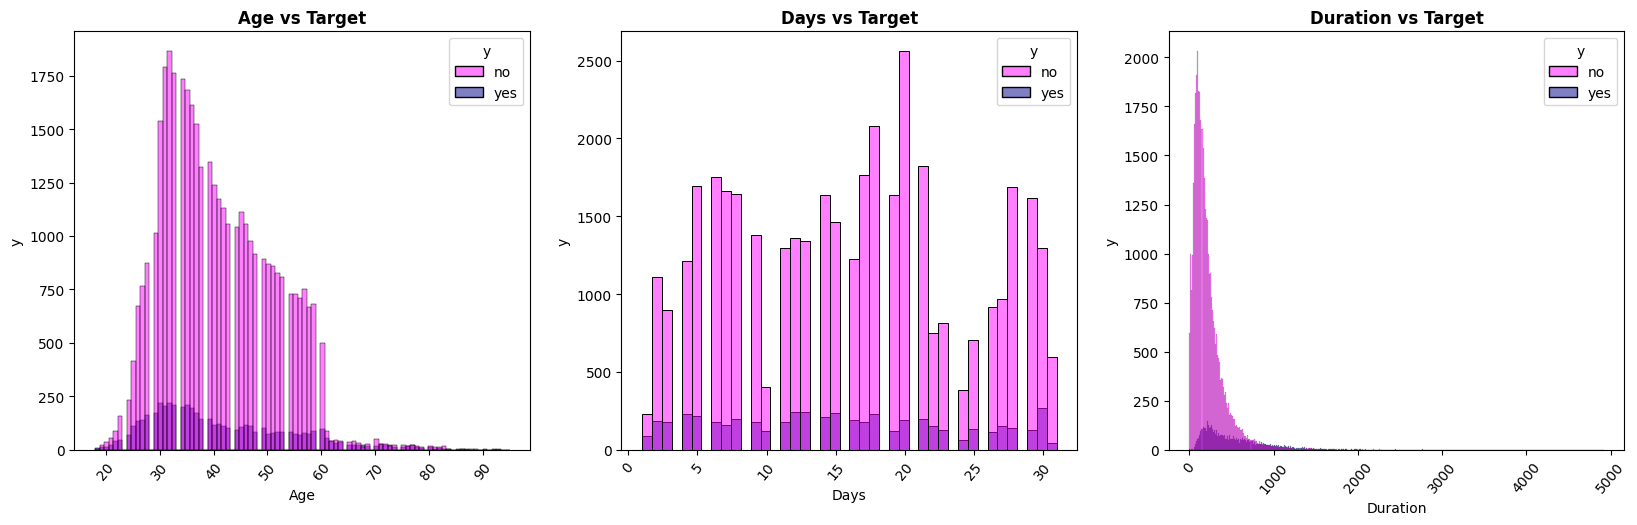

In [25]:
plt.figure(figsize=(20, 25))

my_colors = ['Magenta', 'DarkBlue']

plt.subplot(4,3,1)
sns.histplot(x='age',hue='y',data=db, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Age vs Target', fontweight='bold', color='black' )
plt.xlabel('Age')
plt.ylabel('y')

plt.subplot(4,3,2)
sns.histplot(x='day',hue = 'y',data = db , palette = my_colors)
plt.xticks(rotation = 50)
plt.title('Days vs Target',fontweight = 'bold',color = 'black')
plt.xlabel('Days')
plt.ylabel('y')

plt.subplot(4,3,3)
sns.histplot(x='dur',hue = 'y',data =db,palette = my_colors)
plt.xticks(rotation = 50)
plt.title('Duration vs Target',fontweight = 'bold',color = 'black')
plt.xlabel('Duration')
plt.ylabel('y')

**Ploting of data using number of subscribed**

In [26]:
a = db[db['y']=='yes']

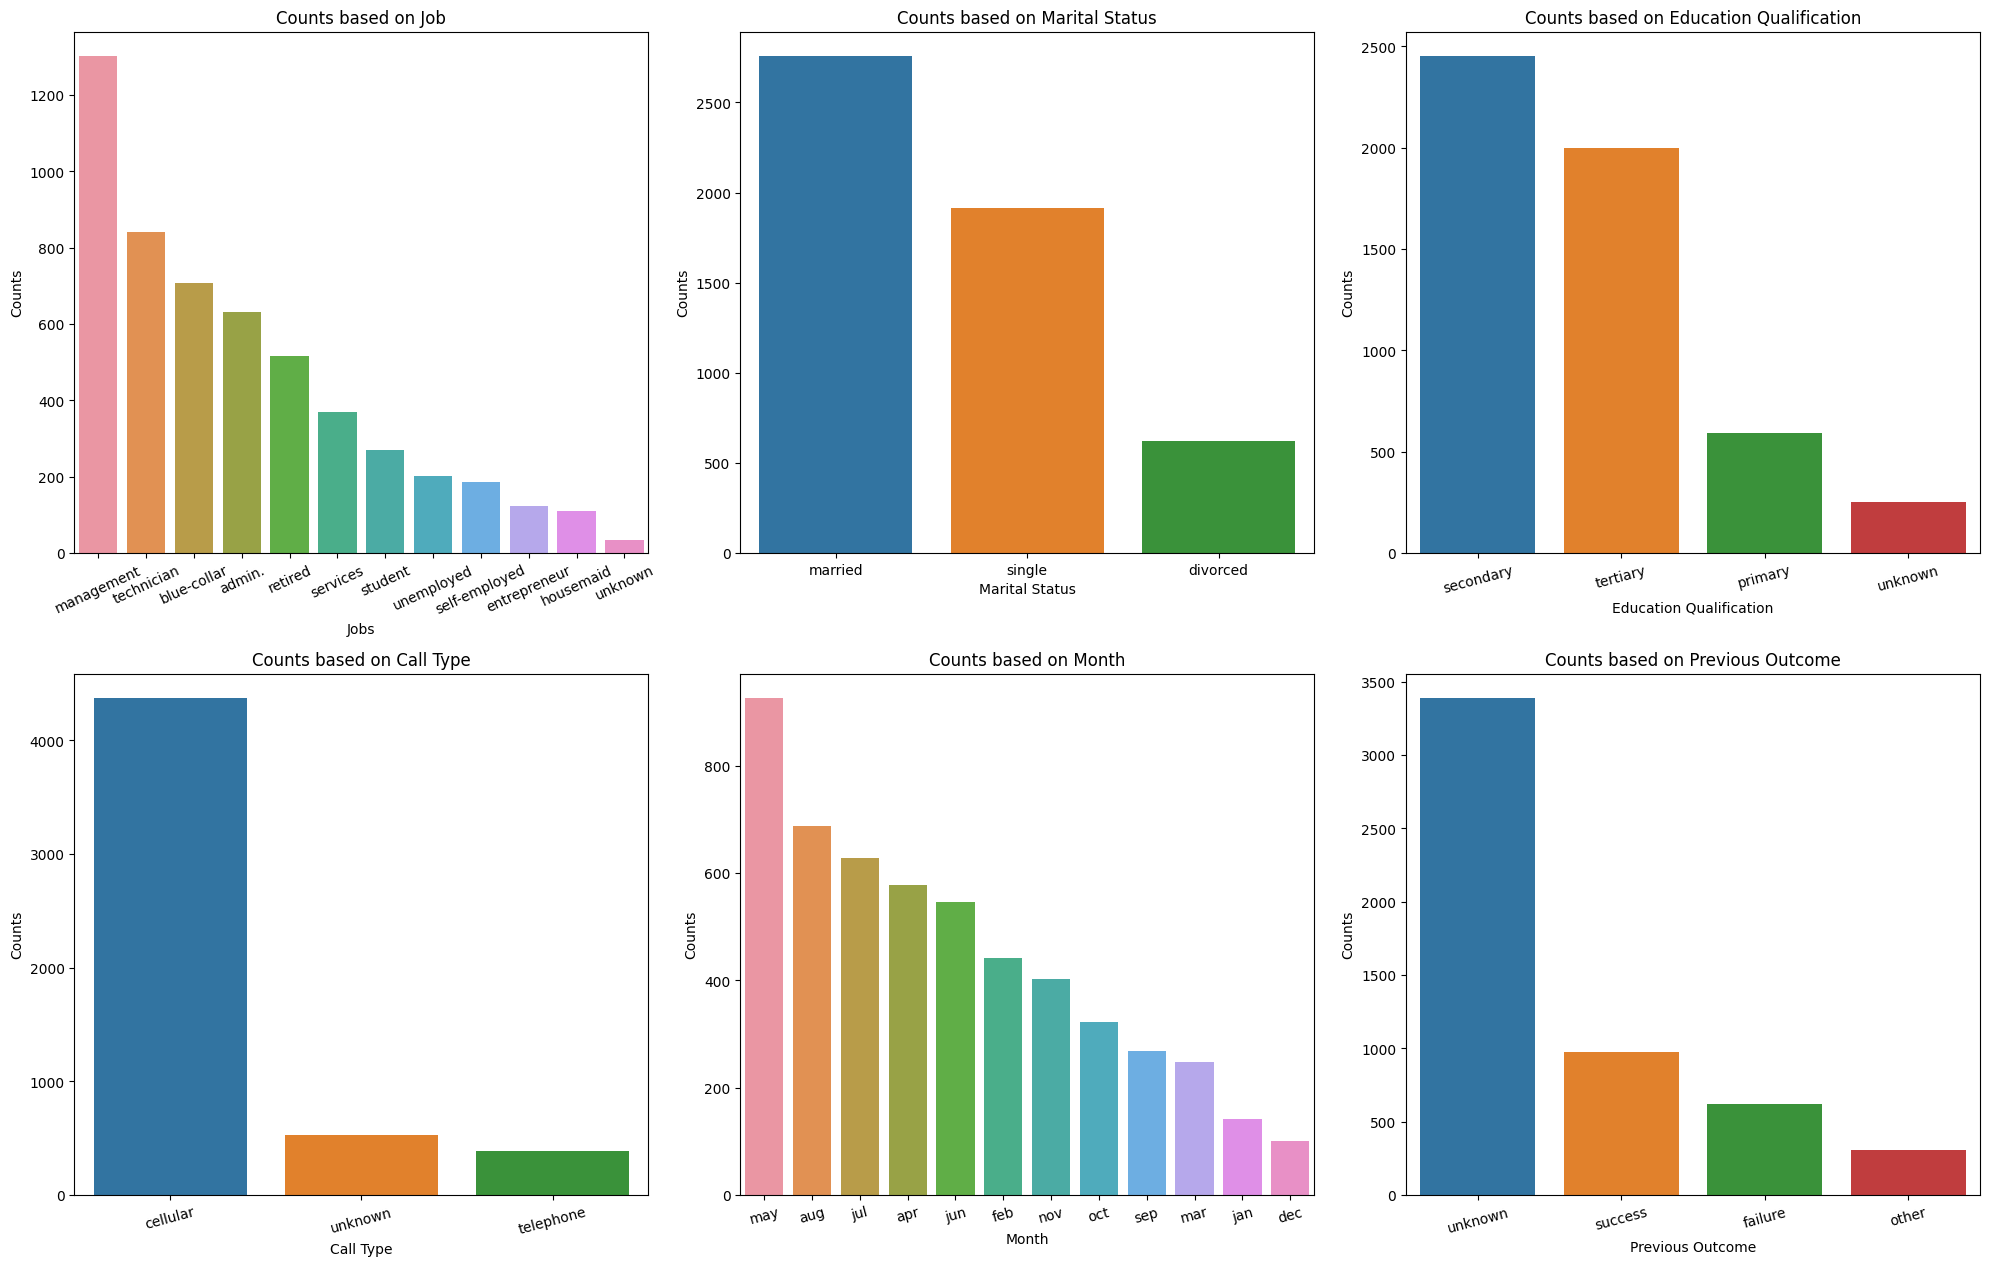

In [27]:
# Create a figure with subplots
plt.figure(figsize=(20, 25))

# Subplot 1
plt.subplot(4, 3, 1)
sns.countplot(data=a, x='job', order=a['job'].value_counts().index)
plt.xticks(rotation=25)
plt.title('Counts based on Job')
plt.xlabel('Jobs')
plt.ylabel('Counts')

# Subplot 2
plt.subplot(4, 3, 2)
sns.countplot(data=a, x='marital', order=a['marital'].value_counts().index)
plt.title('Counts based on Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Counts')

# Subplot 3
plt.subplot(4, 3, 3)
sns.countplot(data=a, x='education_qual', order=a['education_qual'].value_counts().index)
plt.xticks(rotation=15)
plt.title('Counts based on Education Qualification')
plt.xlabel('Education Qualification')
plt.ylabel('Counts')

# Subplot 4
plt.subplot(4, 3, 4)
sns.countplot(data=a, x='call_type', order=a['call_type'].value_counts().index)
plt.xticks(rotation=15)
plt.title('Counts based on Call Type')
plt.xlabel('Call Type')
plt.ylabel('Counts')

# Subplot 5
plt.subplot(4, 3, 5)
sns.countplot(data=a, x='mon', order=a['mon'].value_counts().index)
plt.title('Counts based on Month')
plt.xlabel('Month')
plt.ylabel('Counts')
plt.xticks(rotation=15)

# Subplot 6
plt.subplot(4, 3, 6)
sns.countplot(data=a, x='prev_outcome', order=a['prev_outcome'].value_counts().index)
plt.xticks(rotation=15)
plt.title('Counts based on Previous Outcome')
plt.xlabel('Previous Outcome')
plt.ylabel('Counts')

# Adjust subplot layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


**Overview of plot**

> **Job** : From this column of job ***Management*** is highly subscribed

> **Marital** : From this column of Marital ***Married*** is highly subscribed

>**Education qualification** : In the column of education qualification ***Secondary*** is highly subscribed

> **Call type** : From the column of call type ***Cellular*** is high

>**Month** : In the column of Month ***May*** is highly subscribed

> **Outcome** : From the column of Previous Outcome data ***Unknown*** is high










In [28]:
db.drop(columns=['call_type'],inplace=True)

# **Finding and correcting of outlier**

In [29]:
db.head()

,age,job,marital,education_qual,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,5,may,261,1,unknown,no
1,44,technician,single,secondary,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,5,may,198,1,unknown,no


**Age**

<Axes: xlabel='age'>

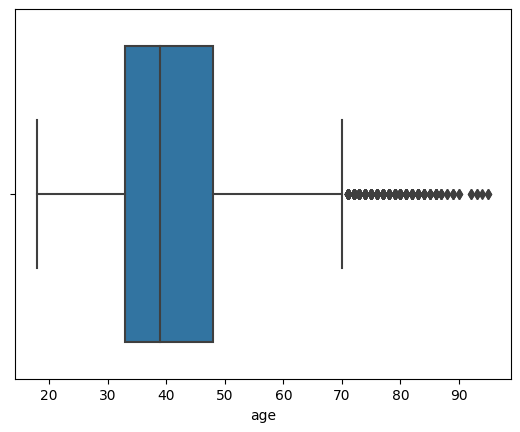

In [30]:
sns.boxplot(x=db['age'])

In [31]:
q1 = db['age'].quantile(0.25)
q2 = db['age'].quantile(0.50)
q3 = db['age'].quantile(0.75)
iqr = q3-q1
ul = q3+1.5*iqr
ll = q1 - 1.5*iqr

In [32]:
print(ul,ll)

70.5 10.5


In [33]:
db['age'] = db['age'].clip(ll,ul)

<Axes: xlabel='age'>

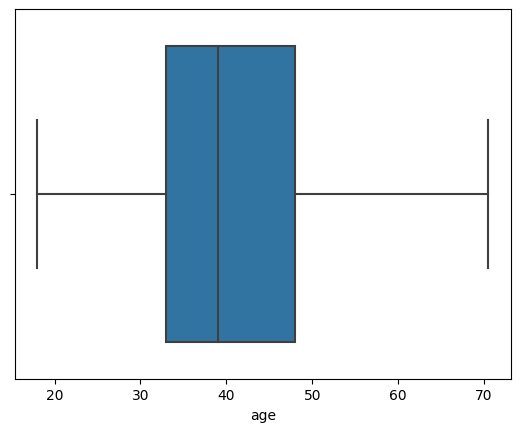

In [34]:
sns.boxplot(x = db['age'])

**Day**

<Axes: xlabel='day'>

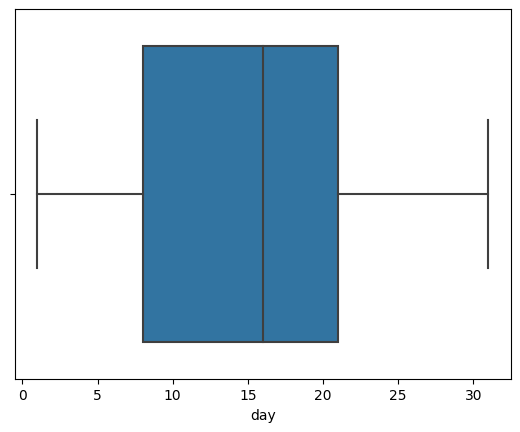

In [35]:
sns.boxplot( x = db['day'])

**Duration**

<Axes: xlabel='dur'>

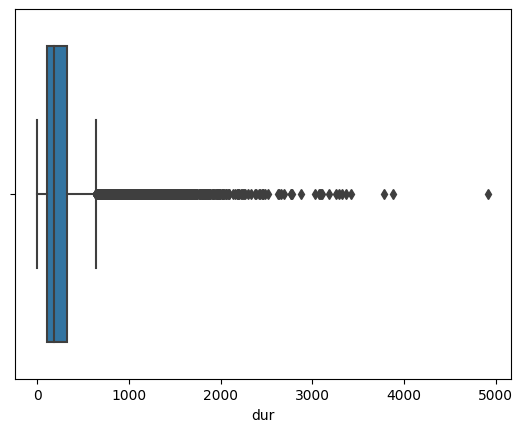

In [36]:
sns.boxplot(x = db['dur'])

In [37]:
q1 = db['dur'].quantile(0.25)
q2 = db['dur'].quantile(0.50)
q3 = db['dur'].quantile(0.75)
iqr = q3-q1
ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr

In [38]:
print(ll,ul)

-221.0 643.0


In [39]:
db['dur'] = db['dur'].clip(ll,ul)

<Axes: xlabel='dur'>

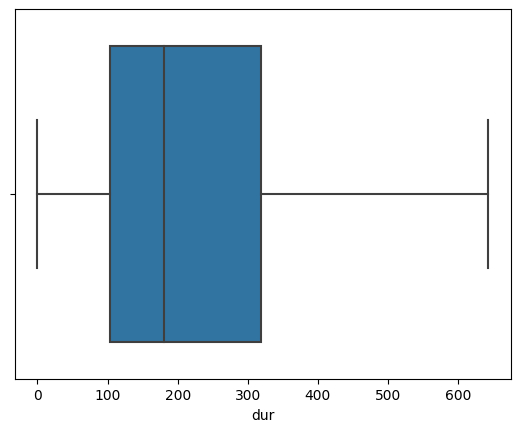

In [40]:
sns.boxplot(x=db['dur'])

**Number of call**

<Axes: xlabel='num_calls'>

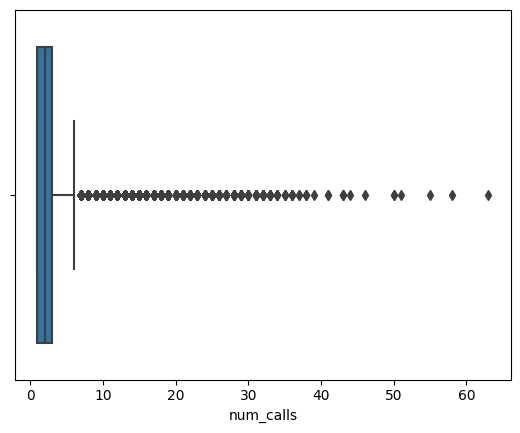

In [41]:
sns.boxplot(x=db['num_calls'])

In [42]:
q1 = db['num_calls'].quantile(0.25)
q2 = db['num_calls'].quantile(0.50)
q3 = db['num_calls'].quantile(0.75)
iqr = q3-q1
ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr

In [43]:
print(ll,ul)

-2.0 6.0


In [44]:
db['num_calls'] = db['num_calls'].clip(ll,ul)

<Axes: xlabel='num_calls'>

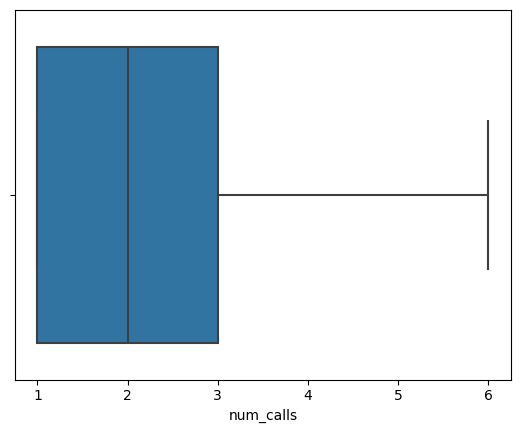

In [45]:
sns.boxplot(x=db['num_calls'])

# **Encoding of Data**

**Encoding** of data is used to convert the categorical string data into numerical data

In [46]:
db['job'] = db['job'].map({'unknown':0,'housemaid':1,'entrepreneur':2,'self-employed':3,'unemployed':4,'student':5,'services':6,'retired':7,'admin.':8,'blue-collar':9,'technician':10,'management':11})
db['marital'] = db['marital'].map({'married':2,'single':1,'divorced':0})
db['education_qual'] = db['education_qual'].map({'secondary':4,'tertiary':3,'primary':1,'unknown':0})
db['mon'] = db['mon'].map({'may':11, 'jun':7, 'jul':9, 'aug':10, 'oct':4, 'nov':5, 'dec':0, 'jan':1, 'feb':6,'mar':2,'apr':8,'sep':3})
db['prev_outcome'] = db['prev_outcome'].map({'unknown':4, 'failure':1, 'other':0, 'success':2})
db['y'] = db['y'].map({'no':1,'yes':0})

In [47]:
db.head()

,age,job,marital,education_qual,day,mon,dur,num_calls,prev_outcome,y
0,58.0,11,2,3,5,11,261,1,4,1
1,44.0,10,1,4,5,11,151,1,4,1
2,33.0,2,2,4,5,11,76,1,4,1
3,47.0,9,2,0,5,11,92,1,4,1
4,33.0,0,1,0,5,11,198,1,4,1


# **Split and train & test of data**

In [48]:
x = db.drop(columns=['y'],axis=1)
y = db['y']

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=70)

# **Balancing of data**

In [51]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

In [52]:
print(len(x_train_smt))
print(len(y_train_smt))

54039
54039


# **Logistic Regression**

In [55]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
logistic_reg.fit(x_train,y_train)
logistic_reg.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1])

In [56]:
logistic_reg.score(x_test,y_test)

0.885104500718788

In [57]:
val = cross_val_score(logistic_reg,x_train,y_train,cv=10).mean()
print("the final score of logistic regression is",round(val,2))

the final score of logistic regression is 0.88


# **Standard Scaler**

In [59]:
scaler = StandardScaler()
scaler.fit(x_train_smt)
x_train_scaled = scaler.transform(x_train_smt)
x_test_scaled = scaler.transform(x_test)

# **KNeighbors Classifier**

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn_values = np.arange(1,50)
cross_val_knn=[]
for k in knn_values:
  knn_regressor=KNeighborsClassifier(k)
  knn_regressor.fit(x_train_scaled,y_train_smt)
  print("K value : ", k, " train score : ", knn_regressor.score(x_train_scaled,y_train_smt)  ,"cross_val_score : ", cross_val_score(knn_regressor,x_train_scaled,y_train_smt,cv = 10).mean())
  cross_val_knn.append(cross_val_score(knn_regressor,x_train_scaled,y_train_smt,cv = 10).mean())

K value :  1  train score :  1.0 cross_val_score :  0.9486298425375163
K value :  2  train score :  0.9671718573622754 cross_val_score :  0.9374157077249488
K value :  3  train score :  0.9712800014804123 cross_val_score :  0.9460575813009552
K value :  4  train score :  0.9601028886544902 cross_val_score :  0.9394327390011279
K value :  5  train score :  0.9610836617998112 cross_val_score :  0.9425231589271142
K value :  6  train score :  0.9544403116267881 cross_val_score :  0.9389331399215806
K value :  7  train score :  0.9547548992394382 cross_val_score :  0.9405616592092585
K value :  8  train score :  0.950443198430763 cross_val_score :  0.9378042950615614
K value :  9  train score :  0.9508873221192102 cross_val_score :  0.938174449510121
K value :  10  train score :  0.9477784563000796 cross_val_score :  0.9358797741419801
K value :  11  train score :  0.9473158274579471 cross_val_score :  0.9351766187137585
K value :  12  train score :  0.945224745091508 cross_val_score :  0.

**k=1 is good cross validation accuracy of 0.9486298425375163**




# **Decision Tree**

In [63]:
from sklearn.tree import DecisionTreeClassifier
max_depth=np.arange(1,50)
cross_val_dt=[]
for d in max_depth:
  dt_regressor= DecisionTreeClassifier(max_depth=d, random_state=0)
  dt_regressor.fit(x_train,y_train)
  print("Depth : ", d, " train Score  : ", dt_regressor.score(x_train_smt,y_train_smt), "cross_val_score : ", cross_val_score(dt_regressor,x_train_smt,y_train_smt,cv = 10).mean())
  cross_val_dt.append(cross_val_score(dt_regressor,x_train_smt,y_train_smt,cv = 10).mean())

Depth :  1  train Score  :  0.4334462147708137 cross_val_score :  0.7897074308170764
Depth :  2  train Score  :  0.61805362793538 cross_val_score :  0.8027906851376398
Depth :  3  train Score  :  0.5500101778345269 cross_val_score :  0.8575661046108524
Depth :  4  train Score  :  0.6333573900331242 cross_val_score :  0.8809194778019668
Depth :  5  train Score  :  0.7328040859379337 cross_val_score :  0.8943358769485877
Depth :  6  train Score  :  0.7208682618109143 cross_val_score :  0.9001280780902349
Depth :  7  train Score  :  0.7645959399692814 cross_val_score :  0.9161719617894656
Depth :  8  train Score  :  0.7731268158182054 cross_val_score :  0.9226856724743622
Depth :  9  train Score  :  0.781639186513444 cross_val_score :  0.9286998525779946
Depth :  10  train Score  :  0.7862839800884547 cross_val_score :  0.9330670668062389
Depth :  11  train Score  :  0.7924832065730306 cross_val_score :  0.9361944484059286
Depth :  12  train Score  :  0.7978126908343974 cross_val_score : 

**depth = 18 is the good cross validation score of 0.95009176715022**

**Importance of column using the decision tree algorithms**

In [68]:
dt = DecisionTreeClassifier(max_depth=18,random_state=0)
dt.fit(x_train,y_train)
print("the score of decision tree",dt.score(x_train_smt,y_train_smt),"ans the cross value is",cross_val_score(dt,x_train_smt,y_train_smt,cv=10).mean())

the score of decision tree 0.8474805233257462 ans the cross value is 0.9500917671502236


In [69]:
ftimp = list(zip(dt.feature_importances_,db.columns[:-1]))
imt = pd.DataFrame(ftimp,columns=['importance','feature'])
imt.sort_values('importance',ascending=False,inplace=True)

In [70]:
imt

,importance,feature
6,0.317958,dur
4,0.154114,day
0,0.149215,age
5,0.129891,mon
8,0.087400,prev_outcome
1,0.059915,job
7,0.047805,num_calls
3,0.033323,education_qual
2,0.020380,marital


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'dur'),
  Text(1, 0, 'day'),
  Text(2, 0, 'age'),
  Text(3, 0, 'mon'),
  Text(4, 0, 'prev_outcome'),
  Text(5, 0, 'job'),
  Text(6, 0, 'num_calls'),
  Text(7, 0, 'education_qual'),
  Text(8, 0, 'marital')])

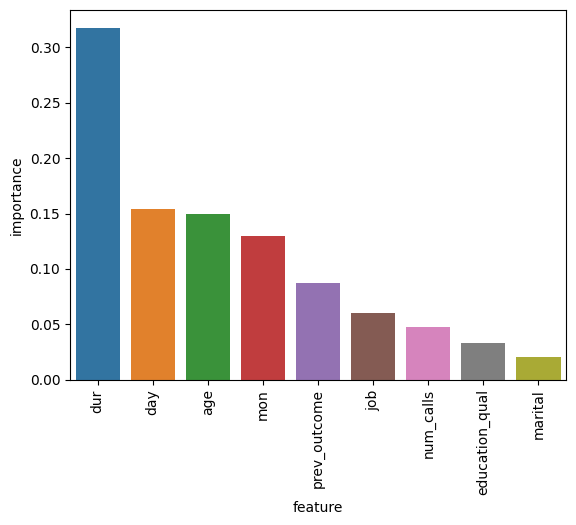

In [71]:
sns.barplot(x=imt['feature'],y=imt['importance'])
plt.xticks(rotation=90)

# **Random forest**

In [73]:
max_depth=np.array([2,4,8,10,11,12,13,15,18,20])
cross_val_rf=[]
for d in max_depth:
  rf_regressor=RandomForestClassifier(max_depth=d, random_state=0)
  rf_regressor.fit(x_train_smt,y_train_smt)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_regressor,x_train_smt,y_train_smt,cv = 15).mean())
  cross_val_rf.append(cross_val_score(rf_regressor,x_train_smt,y_train_smt,cv = 15).mean())

Depth :  2 cross_val_score :  0.8563080183504307
Depth :  4 cross_val_score :  0.8985369041540997
Depth :  8 cross_val_score :  0.9314580015861708
Depth :  10 cross_val_score :  0.9414506666124212
Depth :  11 cross_val_score :  0.9465766261267975
Depth :  12 cross_val_score :  0.951702400712919
Depth :  13 cross_val_score :  0.9561621407787914
Depth :  15 cross_val_score :  0.9627129108534341
Depth :  18 cross_val_score :  0.9663584785931931
Depth :  20 cross_val_score :  0.9674502076821355


**Depth = 20 is the good cross validation score of 0.9674502076821355**

# **XG Boost**

In [72]:
import xgboost as xgb
cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.1,0.2,0.25,0.3]:
  xgb_cl= xgb.XGBClassifier(learning_rate = lr,n_estimators=100)
  xgb_cl.fit(x_train_smt,y_train_smt)
  print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_cl,x_train_smt,y_train_smt,cv = 15).mean())
  cross_val_xgb.append(cross_val_score(xgb_cl,x_train_smt,y_train_smt,cv = 15).mean())

Learning rate :  0.01 cross_val_score: 0.918892470846446
Learning rate :  0.05 cross_val_score: 0.9447259977123347
Learning rate :  0.08 cross_val_score: 0.9512214536912168
Learning rate :  0.1 cross_val_score: 0.9545709410212939
Learning rate :  0.2 cross_val_score: 0.9633980649004684
Learning rate :  0.25 cross_val_score: 0.9652116562950167
Learning rate :  0.3 cross_val_score: 0.9669511222807776


**Learning rate = 0.3 is the good cross validation score of 0.9669511222807776**


In [76]:
xgb_regressor= xgb.XGBRegressor(learning_rate = 0.3,n_estimators=100) # initialise the model
xgb_regressor.fit(x_train_smt,y_train_smt) #train the model


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [77]:
xgb_regressor.feature_importances_

array([0.04313957, 0.02514038, 0.05617463, 0.05800115, 0.03890025,
       0.14472309, 0.26035717, 0.04156028, 0.33200347], dtype=float32)

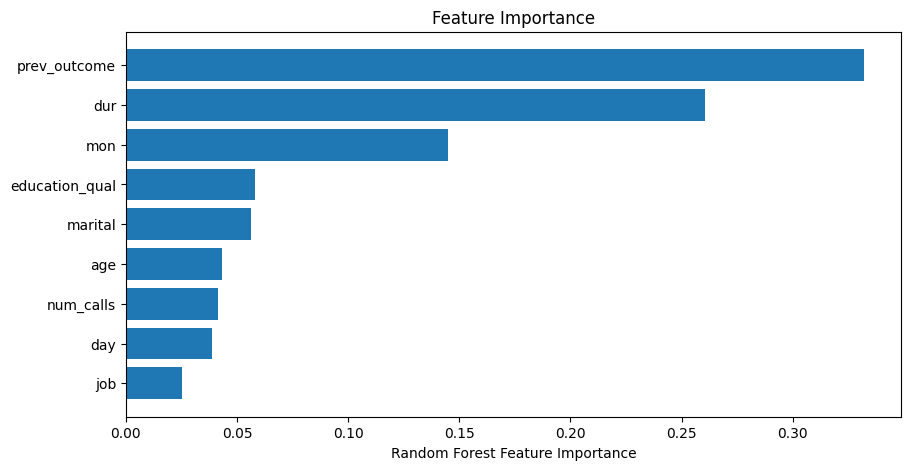

In [78]:
sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(db.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")
plt.show()

# **Conclusion**

Based on the Feature Importance given by best machine Learning that will predict if a client subscribed to the insurance.

The client should focused on the top few features of order given below to have them subscribed to the insurance.

*   Duration - Longer the call better influncing the clients
*   Age - Age of the person plays an important role in insurance. Middle age people are targeted more and people who suscribed to insurance also middle age people.  
*   Day - People who subscribed to insurance are mostly mid of the month.
*   Month - In the month of may people subscribed to insurance are more.
*   Job - In this blue collar people are targeted more but people who subscribed more are from management job.
